## Observations and Insights 

In [106]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import scipy.stats as sem

%matplotlib notebook
%matplotlib inline

# Study data files
mouse_metadata_path = "./data/Mouse_metadata.csv"
study_results_path = "./data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
dfmousestudy = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
dfmousestudy.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
#  Checking the number of mice
mice_total = len(dfmousestudy['Mouse ID'].unique())
mice_total

249

In [3]:
all_mice = len(dfmousestudy['Mouse ID'])
all_mice


1893

In [4]:
unique_dfmousestudy = dfmousestudy.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
unique_dfmousestudy

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Optional: Get all the data for the duplicate mouse ID. 
duplicates=dfmousestudy[dfmousestudy.duplicated(["Mouse ID", "Timepoint"], keep=False)]
duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
unique_dfmousestudy

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
len(unique_dfmousestudy['Mouse ID'].unique())

249

## Summary Statistics

In [8]:
unique_dfmousestudy.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.
by_regimen = unique_dfmousestudy.loc[:,['Tumor Volume (mm3)', 'Drug Regimen']].groupby('Drug Regimen')
drug_mean = round(by_regimen['Tumor Volume (mm3)'].mean(),2)
drug_median = round(by_regimen['Tumor Volume (mm3)'].median(),2)
drug_variance = round(by_regimen['Tumor Volume (mm3)'].var(),2)
drug_stdev = (round(by_regimen['Tumor Volume (mm3)'].std(),2))
drug_sem = round(by_regimen['Tumor Volume (mm3)'].sem(),4)
drug_data = {"Mean": drug_mean, "Median": drug_median, 
             "Variance": drug_variance, 
             "Std Dev": drug_stdev, "SEM": drug_sem}
summary_regimen = pd.DataFrame(drug_data)
summary_regimen


,Mean,Median,Variance,Std Dev,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.3293
Ceftamin,52.59,51.78,39.29,6.27,0.4698
Infubinol,52.88,51.82,43.13,6.57,0.4922
Ketapril,55.24,53.70,68.55,8.28,0.6039
Naftisol,54.33,52.51,66.17,8.13,0.5965
Placebo,54.03,52.29,61.17,7.82,0.5813
Propriva,52.39,50.91,43.14,6.57,0.5259
Ramicane,40.22,40.67,23.49,4.85,0.3210
Stelasyn,54.23,52.43,59.45,7.71,0.5731


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function

## Bar and Pie Charts

In [11]:
grouped_regimen = mouse_metadata.loc[:,['Mouse ID', 'Drug Regimen']].groupby('Drug Regimen')
mice_by_regimen = grouped_regimen['Mouse ID'].count()
mg1=pd.DataFrame(mice_by_regimen)
mg1

,Mouse ID
Drug Regimen,
Capomulin,25
Ceftamin,25
Infubinol,25
Ketapril,25
Naftisol,25
Placebo,25
Propriva,25
Ramicane,25
Stelasyn,24


<IPython.core.display.Javascript object>


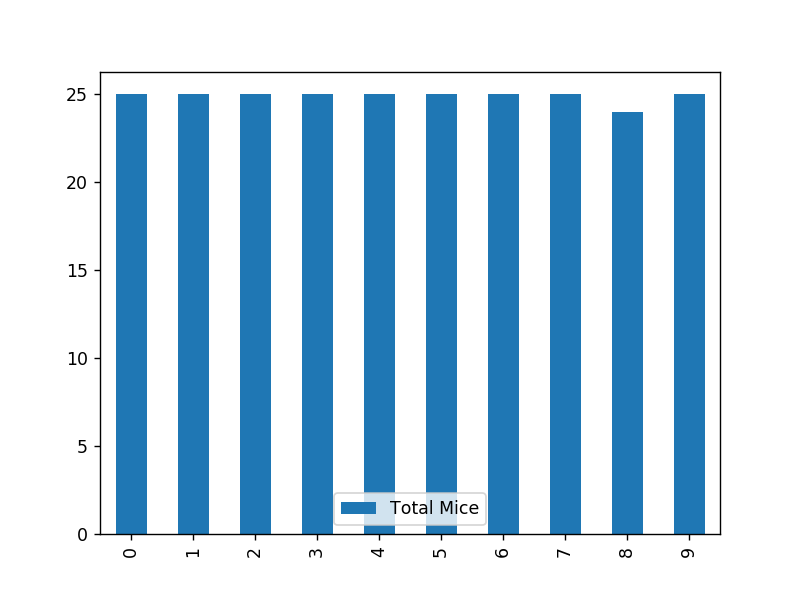

In [13]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas.

mice_group = [25,25,25,25,25,25,25,25,24,25]
regimen = ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramincane', 'Stelasyn', 'Zoniferol']
panda_plot = pd.DataFrame({'Total Mice': mice_group, 'Regimen': regimen})
graph = panda_plot.plot.bar(rot=90)

<IPython.core.display.Javascript object>


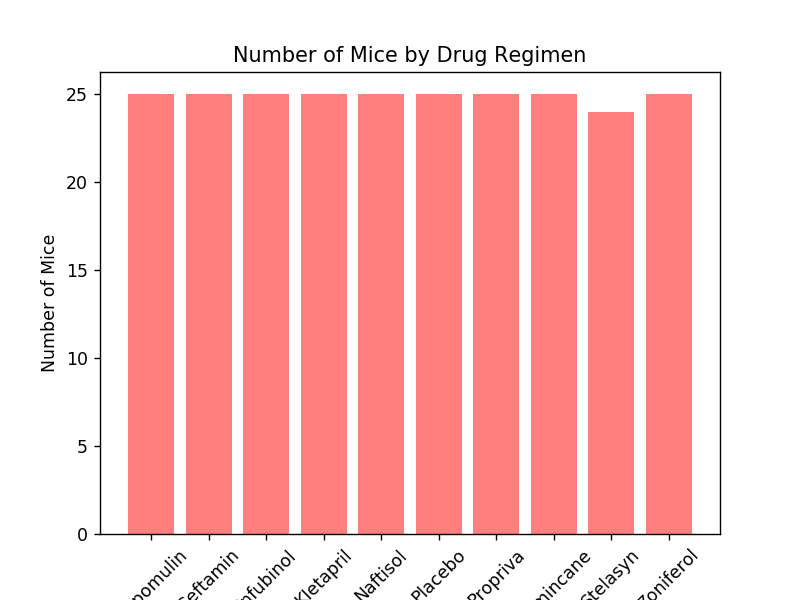

Text(0, 0.5, 'Number of Mice')

In [14]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot. 
grouped_regimen = mouse_metadata.loc[:,['Mouse ID', 'Drug Regimen']].groupby('Drug Regimen')
mice_by_regimen = grouped_regimen.count()['Mouse ID']
x_axis = np.arange(len(mice_by_regimen))
plt.bar(x_axis, mice_by_regimen, color='r', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ('Capomulin', 'Ceftamin', 'Infubinol', 'KIetapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramincane', 'Stelasyn', 'Zoniferol'), rotation=45)
plt.title("Number of Mice by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
grouped_gender = mouse_metadata.loc[:,['Sex']].groupby('Sex')
sizes = grouped_gender['Sex'].count()
sizes
# gender_split = ['Male', 'Female']
# panda_gender = pd.DataFrame({'Amount': sizes})
# pie_gender = panda_gender.plot.pie(x=sizes, y=gender_split, figsize=(2,2))

Sex
Female    124
Male      125
Name: Sex, dtype: int64

<IPython.core.display.Javascript object>


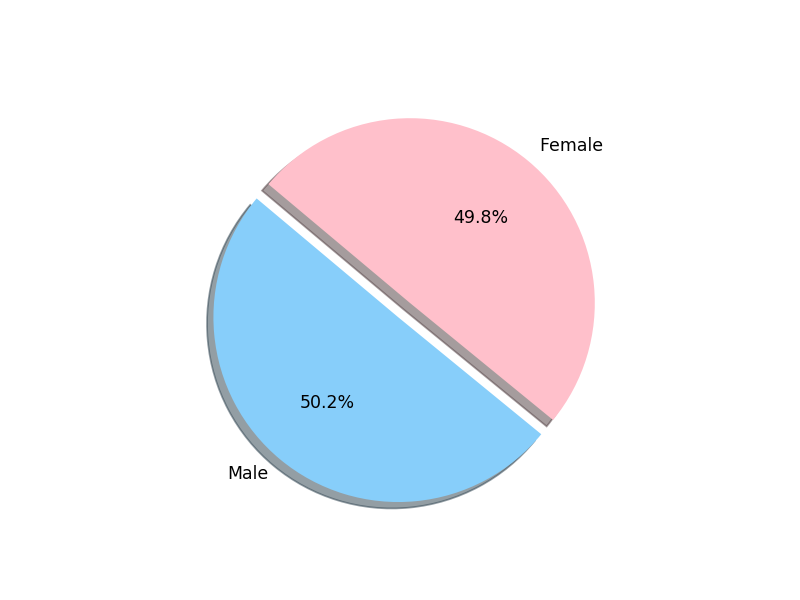

([<matplotlib.patches.Wedge at 0x15e5149d408>,
 [Text(-0.7655308193487089, -0.9241009493704109, 'Male'),
  Text(0.7017365844029833, 0.8470925369228766, 'Female')],
 [Text(-0.44655964462008013, -0.5390588871327396, '50.2%'),
  Text(0.38276540967435446, 0.4620504746852053, '49.8%')])

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Male', 'Female']
sizes = mouse_metadata['Sex'].value_counts()
colors = ['lightskyblue', 'pink']
explode = (0.1,0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, shadow=True, autopct="%1.1f%%", startangle=140)

## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
d_cap=unique_dfmousestudy.loc[(unique_dfmousestudy["Drug Regimen"]=='Capomulin')]
d_ram=unique_dfmousestudy.loc[(unique_dfmousestudy["Drug Regimen"]=='Ramicane')]
d_inf=unique_dfmousestudy.loc[(unique_dfmousestudy["Drug Regimen"]=='Infubinol')]
d_cef=unique_dfmousestudy.loc[(unique_dfmousestudy["Drug Regimen"]=='Ceftamin')]

filter_drug=d_cap.append(d_ram).append(d_inf).append(d_cef)
filter_drug
# Start by getting the last (greatest) timepoint for each mouse
last_timepoint= filter_drug.loc[filter_drug.groupby(['Mouse ID'])['Timepoint'].idxmax()]
last_timepoint                            


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
463,a203,Infubinol,Female,20,23,45,67.973419,2
473,a251,Infubinol,Female,21,25,45,65.525743,1
493,a275,Ceftamin,Female,20,28,45,62.999356,3
327,a411,Ramicane,Male,3,22,45,38.407618,1
430,a444,Ramicane,Female,10,25,45,43.047543,0
...,...,...,...,...,...,...,...,...
1845,y769,Ceftamin,Female,6,27,45,68.594745,4
124,y793,Capomulin,Male,17,17,45,31.896238,2
1855,y865,Ceftamin,Male,23,26,45,64.729837,3
84,z578,Ramicane,Male,11,16,45,30.638696,0


In [18]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list=last_timepoint['Drug Regimen'].unique().tolist()
drug_list

['Infubinol', 'Ceftamin', 'Ramicane', 'Capomulin']

In [20]:
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_cap = []
tumor_vol_ram = []
tumor_vol_inf = []
tumor_vol_cef = []


In [21]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

quartiles = last_timepoint['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Tumor Volume (mm3) is: {lowerq}")
print(f"The upper quartile of Tumor Volume (mm3) is: {upperq}")
print(f"The interquartile range of Tumor Volume (mm3) is: {iqr}")
print(f"The the median of Tumor Volume (mm3) is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
    


The lower quartile of Tumor Volume (mm3) is: 37.187743802499995
The upper quartile of Tumor Volume (mm3) is: 59.930261755000004
The interquartile range of Tumor Volume (mm3) is: 22.74251795250001
The the median of Tumor Volume (mm3) is: 45.0 
Values below 3.0739668737499812 could be outliers.
Values above 94.04403868375002 could be outliers.


In [112]:
# Locate the rows which contain mice on each drug and get the tumor volumes

drugTypes = drug_list
allValsDict={}

for drug_type in drugTypes:
    allValsDict[drug_type]=last_timepoint.loc[last_timepoint['Drug Regimen']==drug_type, ['Tumor Volume (mm3)']]
#     series = pd.Series(allValsDict[drug_type])
    
# print(allValsDict)    
    
       # add subset 

tumor_vol_cap = allValsDict['Capomulin']
tumor_vol_ram = allValsDict['Ramicane']
tumor_vol_inf = allValsDict['Infubinol']
tumor_vol_cef = allValsDict['Ceftamin']   
tumor_data = {'Capomulin': tumor_vol_cap, 'Ramicane': tumor_vol_ram, 'Infubinol':tumor_vol_inf, 'Ceftamin': tumor_vol_cef}
type(d_cap)

pandas.core.frame.DataFrame

In [23]:
 # Determine outliers using upper and lower bounds (APPEARS TO BE NONE)
outlier_drug = last_timepoint.loc[(last_timepoint['Tumor Volume (mm3)'] < lower_bound) | (last_timepoint['Tumor Volume (mm3)'] > upper_bound)]    
outlier_drug

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


In [122]:
#turn regimen dictionaries into lists
list_cap = tumor_vol_cap.values.tolist()
list_ram = tumor_vol_ram.values.tolist()
list_inf = tumor_vol_inf.values.tolist()
list_cef = tumor_vol_cef.values.tolist()
#tuple
list_regimens = (list_cap, list_cef, list_inf, list_ram)

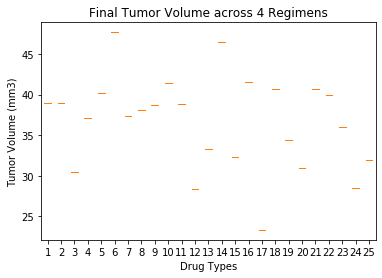

In [158]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# e1 = list_cap
# e2 = list_ram
# e3 = list_inf
# e4 = list_cef

# treatments = [e1, e2, e3, e4]
# pos = np.arange(treatments)

fig1, ax1 = plt.subplots()
# fig.text(0.5, 0.01, 'Final Tumor Volume across 4 Regimens', ha='center', va='center')
ax1.set_title('Final Tumor Volume across 4 Regimens')
ax1.set_xlabel('Drug Types')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(tumor_vol_cap)
plt.show()

## Line and Scatter Plots

In [107]:
tumor_794 = round(unique_dfmousestudy[115:124]['Tumor Volume (mm3)'],2).tolist()
tumor_794

[45.0, 41.02, 41.63, 42.28, 40.72, 38.99, 35.73, 36.33, 31.48]

In [108]:
mouse_794 = unique_dfmousestudy[115:124]['Timepoint'].tolist()
mouse_794

[0, 5, 10, 15, 20, 25, 30, 35, 40]

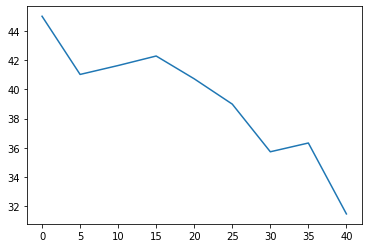

In [98]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

x_axis_data = (mouse_794)
y_axis = (tumor_794)
plt.title = ('Mouse 794 - Tumor Volume over Timepoint')
plt.plot(x_axis_data, y_axis)
plt.show()
plt.title=("Timepoint vs. Tumor Vol on Capomulin")
plt.xlabel = ('Timepoints')
plt.ylabel = ('Tumor Volume (mm3)')

In [ ]:
# plt.scatter(unique_dfmousestudy['Weight (g)'],to
# clb = plt.colorbar()
# plt.xlabel("Longitude")
# plt.ylabel("Latitude")
# clb.set_label("Median Income")
# plt.show()

In [137]:
#Avg tumor volume by Capomulin
avg_cap = round(d_cap['Tumor Volume (mm3)'].mean(),2)
avg_cap

40.68

Text(0.5, 0.01, 'Weight versus Tumor Volume')

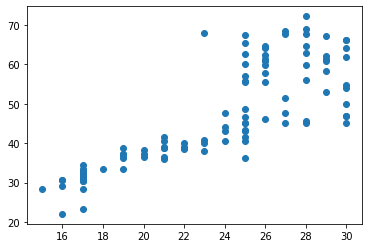

In [160]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

plt.scatter(last_timepoint["Weight (g)"], last_timepoint["Tumor Volume (mm3)"], marker="o") 
fig.text(0.5, 0.01, 'Weight versus Tumor Volume', ha='center', va='center')
# plt.ylabel('Tumor Volume')
# plt.xlabel('Weight')
# plt.grid(True)

In [134]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
x_limit = 100
x_axis = np.arange(unique_dfmousestudy('Weight (g)'))
#create array of data for y values                   
y_axis = [avg_cap]
plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black",
            s=x_axis, alpha=0.75)
                   
                   
                   

TypeError: 'DataFrame' object is not callable

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
